### Student: Eduardo S. Ito (RA 159086)
### Student: Thales E. Nazatto (RA 074388)
# Project 2: Evolutionary Computing

In [1]:
import matplotlib.pyplot as plt


def plot_fitness(generationsResult):
    best = list(map(lambda result: result["best"], generationsResult))
    mean = list(map(lambda result: result["mean"], generationsResult))
    worst = list(map(lambda result: result["worst"], generationsResult))
    plt.plot(best, label="best")
    plt.plot(mean, label="mean")
    plt.plot(worst, label="worst")

    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Knapsack Problem")
    plt.legend(loc='lower left', frameon=True)

    plt.show()

In [2]:
from knapsack.config import Config
from knapsack.genetic_algorithm import GeneticAlgorithmFacade
from knapsack.generation import GenerationStrategy
from knapsack.mutation import MutationStrategy
from knapsack.problem import ProblemType
from knapsack.reproduction import ReproductionStrategy
from knapsack.selection import SelectionStrategy
from knapsack.stop_criteria import StopCriteriaType

## Initial abstraction

### Objective Function
The objective function is to fill up knapsack with more valuable products, respecting established maximum weight. Each product has weight and value. The aim is to optimize the filling up of knapsack with more value products and within the maximum weight, as precondition.

<img src="abstraction.png"/>

### Stop criteria
The Stop Criteria is reached when maximum value of filled knapsack within maximum weight, during 3 interactions
### References
https://www.youtube.com/watch?v=9kbzMeEBvUY

## Examples

### Configurations

In [32]:
#Problem configuration
maximization_knapsack_problem = {
    'type': ProblemType.MAXIMIZATION,
    'values': [0, 1],
    'costs': [100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550],
    'weights': [50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70],
    'cargo': 600
}
minimization_example_problem = {
    'type': ProblemType.MINIMIZATION,
    'values': [0, 1],
    'costs': [100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550],
    'weights': [50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70],
    'cargo': 600
}

#Selection configurations
roulette_selection = {
    'strategy': SelectionStrategy.ROULETTE
}
tournament_selection = {
    'strategy': SelectionStrategy.TOURNAMENT_BATTLE_ROYALE
}
tournament_playoff_selection = {
    'strategy': SelectionStrategy.TOURNAMENT_PLAYOFF
}

#Reproduction configurations
single_crossover_reproduction = {
    'strategy': ReproductionStrategy.SEXUAL_SINGLE_POINT,
    'rate': 0.8
}
double_crossover_reproduction = {
    'strategy': ReproductionStrategy.SEXUAL_DOUBLE_POINTS,
    'rate': 0.8
}
asexual_reproduction = {
    'strategy': ReproductionStrategy.ASEXUAL,
    'rate': 0.8
}

#Mutation configurations
generative_mutation = {
    'strategy': MutationStrategy.GENERATIVE,
    'rate': 0.2
}
swap_mutation = {
    'strategy': MutationStrategy.SWAP,
    'rate': 0.2
}
seq_swap_mutation = {
    'strategy': MutationStrategy.SEQUENCE_SWAP,
    'rate': 0.2
}

#Generation configurations
generation_by_exchange = {
    'strategy': GenerationStrategy.EXCHANGE,
    'population_size': 25,
}
generation_by_elitism = {
    'strategy': GenerationStrategy.ELITISM,
    'population_size': 25,
}
generation_by_steady_state = {
    'strategy': GenerationStrategy.STEADY_STATE,
    'substituted_population_size': 10,
    'population_size': 25,
}

#Stop Criteria configurations
max_generations_criteria = {
    'num_generations': 100,
    'type': StopCriteriaType.MAX_GENERATIONS
}
max_fitness_criteria = {
    'fitness': -1,
    'type': StopCriteriaType.MAX_FITNESS
}
convergence_criteria = {
    'quorum': 0.97,
    'type': StopCriteriaType.CONVERGENCE
}

### Selection - Using Tournament

Generation 1
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1] Fitness: 2790 Cost: 2790 Cargo: 500
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0] Fitness: 1350 Cost: 1350 Cargo: 310
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 1850 Cost: 1850 Cargo: 330
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 2770 Cost: 2770 Cargo: 510
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 710
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0] Fitness: 1210 Cost: 1210 Cargo: 210
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0] Fitness: 1450 Cost: 1450 Cargo: 390
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 1580 Cost: 1580 Cargo: 310
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1] Fitness: 2660 Cost: 2660 Cargo: 520
[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1] Fitness: 1210 Cost: 1210 Cargo: 250
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2030 Cost: 2030 Cargo: 350
[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1] Fitness: 1350 Cost: 1350 Cargo: 300
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0] Fitness: 1280 Cost: 1280 Cargo: 190
[

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 570
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3230 Cargo: 660
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 560
[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3170 Cost: 3170 Cargo: 580
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 560
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3280 Cargo: 630
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 580
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3460 Cargo: 640
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 590
[0, 0, 0, 0, 1, 

Generation 19
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3350 Cargo: 630
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3530 Cargo: 660
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3240 Cargo: 620
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3420 Cargo: 650
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3420 Cargo: 650
[0, 1, 1

[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590

Best: 3490 Mean: 3326.76 Worst: -1

Generation 25
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3410 Cargo: 640
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]

Generation 31
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 530
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 59

Generation 37
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 58

Generation 43
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3630 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3460 Cargo: 610
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3630 Cargo: 650

Best: 3600 Mean: 3157.88 Worst: -1

Generation 49
[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2730 Cost: 2730 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] F

[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: -1 Cost: 3070 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2810 Cost: 2810 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3910 Cargo: 710
[0, 1, 1, 1, 0, 

Generation 61
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1

Generation 67
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 3010 Cost: 3010 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3350 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 73
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: 2980 Cost: 2980 Cargo: 590
[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 580
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3200 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 570
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3270 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 83
[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2730 Cost: 2730 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3130 Cost: 3130 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3080 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0

Generation 89
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3310 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Best: 3600 Mean: 3118.28 Worst: -1

Generation 95
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3080 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fi


Best choice: 
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


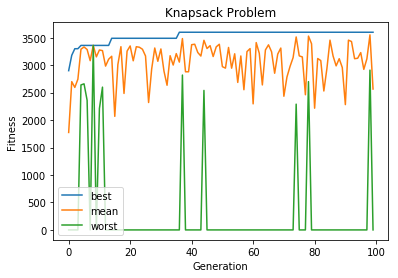

In [11]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': tournament_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': seq_swap_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Selection - Using Roulette

Generation 1
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0] Fitness: 410 Cost: 410 Cargo: 110
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] Fitness: 2880 Cost: 2880 Cargo: 570
[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0] Fitness: 1930 Cost: 1930 Cargo: 390
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1] Fitness: 1110 Cost: 1110 Cargo: 260
[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0] Fitness: 1480 Cost: 1480 Cargo: 320
[1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0] Fitness: 1470 Cost: 1470 Cargo: 390
[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0] Fitness: 1840 Cost: 1840 Cargo: 480
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 530
[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0] Fitness: 2160 Cost: 2160 Cargo: 520
[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0] Fitness: 2280 Cost: 2280 Cargo: 430
[1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3030 Cargo: 610
[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1] Fitness: 1770 Cost: 1770 Cargo: 390
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fitness: 3090 Cost: 3090 Cargo: 590
[1,

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0] Fitness: 1290 Cost: 1290 Cargo: 280
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 560
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0] Fitness: 1970 Cost: 1970 Cargo: 410
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: -1 Cost: 3120 Cargo: 610
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3110 Cost: 3110 Cargo: 580
[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2350 Cost: 2350 Cargo: 400
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: 2220 Cost: 2220 Cargo: 420
[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2360 Cost: 2360 Cargo: 410
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 560
[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0] Fitness: 1470 Cost: 1470 Cargo: 360
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0] Fitness: 2140 Cost: 2140 Cargo: 530
[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 1960 Cost: 1960 Cargo: 420

Best: 3110 Mean: 1908.72 Worst: -1

Generation 9
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1] 

Generation 15
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 2830 Cost: 2830 Cargo: 490
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2950 Cost: 2950 Cargo: 580
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0] Fitness: 2220 Cost: 2220 Cargo: 400
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 2950 Cost: 2950 Cargo: 510
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 2830 Cost: 2830 Cargo: 490
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 3070 Cargo: 630
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2620 Cost: 2620 Cargo: 490
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2620 Cost: 2620 Cargo: 490
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 2830 Cost: 2830 Cargo: 490
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0] Fitness: 1740 Cost: 1740 Cargo: 320
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 500
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3180 Cost: 3180 Cargo: 580


[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0] Fitness: 1500 Cost: 1500 Cargo: 350
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0] Fitness: 2590 Cost: 2590 Cargo: 430
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 450
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2510 Cost: 2510 Cargo: 450
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0] Fitness: 2790 Cost: 2790 Cargo: 530
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2510 Cost: 2510 Cargo: 450
[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2410 Cost: 2410 Cargo: 470
[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0] Fitness: 2490 Cost: 2490 Cargo: 500

Best: 3100 Mean: 2496.76 Worst: -1

Generation 22
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 430
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2060 Cost: 2060 Cargo: 350
[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0] Fitness: 2690 Cost: 2690 Cargo: 480
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 2390 Cost: 2390 Cargo: 470
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0] Fitness: 2050 Cost: 2050 Cargo: 460
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 2240 Cost: 2240 Cargo: 410
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2410 Cost: 2410 Cargo: 470
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2600 Cost: 2600 Cargo: 490

Best: 3100 Mean: 2284.68 Worst: -1

Generation 28
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 2600 Cost: 2600 Cargo: 470
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2600 Cost: 2600 Cargo: 490
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2590 Cost: 2590 Cargo: 490
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

Generation 34
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2490 Cost: 2490 Cargo: 440
[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0] Fitness: 1660 Cost: 1660 Cargo: 280
[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2360 Cost: 2360 Cargo: 430
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2680 Cost: 2680 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3450 Cargo: 680
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 3100 Cost: 3100 Cargo: 590
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 540
[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2230 Cost: 2230 Cargo: 450
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0] Fitness: 1940 Cost: 1940 Cargo: 430
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0] Fitness: 2360 Cost: 2360 Cargo: 430
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 540


Generation 39
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 2800 Cost: 2800 Cargo: 530
[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1] Fitness: 1910 Cost: 1910 Cargo: 330
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 540
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 520
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3550 Cargo: 680
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2290 Cost: 2290 Cargo: 410
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 540
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0] Fitness: 2940 Cost: 2940 Cargo: 520
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 480
[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490


[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2610 Cost: 2610 Cargo: 400
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 590
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2960 Cost: 2960 Cargo: 490
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 3110 Cost: 3110 Cargo: 570
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0] Fitness: 1530 Cost: 1530 Cargo: 360
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 640
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2960 Cost: 2960 Cargo: 590
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 540
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 540
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 480
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 2830 Cost: 2830 Cargo: 440
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 450
[0, 0, 1, 1, 1

Generation 51
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 2420 Cost: 2420 Cargo: 380
[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0] Fitness: 1670 Cost: 1670 Cargo: 280
[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0] Fitness: 2300 Cost: 2300 Cargo: 470
[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0] Fitness: 2120 Cost: 2120 Cargo: 420
[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: 2410 Cost: 2410 Cargo: 440
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 2420 Cost: 2420 Cargo: 380
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 2420 Cost: 2420 Cargo: 380
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1] Fitness: 2480 Cost: 2480 Cargo: 420
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0] Fitness: 2290 Cost: 2290 Cargo: 460
[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2490 Cost: 2490 Cargo: 430
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490


Generation 57
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 480
[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2420 Cost: 2420 Cargo: 440
[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 2820 Cost: 2820 Cargo: 490
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 500
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 520
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 570
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 410
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 600
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3190 Cost: 3190 Cargo: 520
[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2340 Cost: 2340 Cargo: 420
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 2560 Cost: 2560 Cargo: 45

Generation 63
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3690 Cargo: 690
[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2350 Cost: 2350 Cargo: 370
[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 500
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1] Fitness: 2130 Cost: 2130 Cargo: 350
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1] Fitness: 2430 Cost: 2430 Cargo: 390
[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 500
[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2680 Cost: 2680 Cargo: 520
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 1490 Cost: 1490 Cargo: 310
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 600
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 560
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2200 Cost: 2200 Cargo: 410
[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 2980 Cost: 2980 Cargo: 520


[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1] Fitness: 1960 Cost: 1960 Cargo: 310
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2350 Cost: 2350 Cargo: 360
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 2250 Cost: 2250 Cargo: 460
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3190 Cost: 3190 Cargo: 520
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1] Fitness: 2410 Cost: 2410 Cargo: 430
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3160 Cost: 3160 Cargo: 570

Best: 3280 Mean: 2543.56 Worst: -1

Generation 69
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3190 Cost: 3190 Cargo: 580
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 560
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 

Best: 3600 Mean: 2483.92 Worst: -1

Generation 75
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3480 Cargo: 630
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2620 Cost: 2620 Cargo: 490
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 460
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0] Fitness: 2400 Cost: 2400 Cargo: 470
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2230 Cost: 2230 Cargo: 390
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2720 Cost: 2720 Cargo: 540
[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 520
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2620 Cost: 2620 Cargo: 490
[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3310 Cargo: 640
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 460
[1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1] Fitness: 2060 Cost: 2060 Cargo: 430
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 570
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0] Fi

Generation 82
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2050 Cost: 2050 Cargo: 320
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2150 Cost: 2150 Cargo: 440
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490
[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2530 Cost: 2530 Cargo: 390
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 2770 Cost: 2770 Cargo: 450
[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 2360 Cost: 2360 Cargo: 420
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: 2980 Cost: 2980 Cargo: 590
[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1] Fitness: 2450 Cost: 2450 Cargo: 440
[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2530 Cost: 2530 Cargo: 390
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 460
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1] Fitness: 1990 Cost: 1990 Cargo: 36

[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 460
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 480
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 480
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0] Fitness: 2520 Cost: 2520 Cargo: 460

Best: 3500 Mean: 3085.6 Worst: 2500

Generation 89
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3080 Cargo: 640
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3270 Cost: 3270 Cargo: 550
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 480
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1

[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2510 Cost: 2510 Cargo: 490
[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2460 Cost: 2460 Cargo: 380
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 590
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2610 Cost: 2610 Cargo: 460
[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0] Fitness: 1320 Cost: 1320 Cargo: 300

Best: 3510 Mean: 2822.8 Worst: 1320

Generation 96
[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2460 Cost: 2460 Cargo: 380
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 530
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 510
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 400
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 520
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,

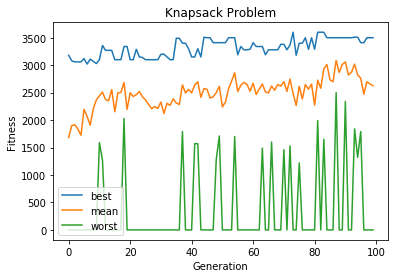

In [12]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': seq_swap_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Population Generation - Using Elitism

Generation 1
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0] Fitness: 2350 Cost: 2350 Cargo: 510
[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1] Fitness: 1770 Cost: 1770 Cargo: 380
[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] Fitness: 1150 Cost: 1150 Cargo: 260
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1] Fitness: 1140 Cost: 1140 Cargo: 210
[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0] Fitness: 1650 Cost: 1650 Cargo: 330
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] Fitness: 720 Cost: 720 Cargo: 120
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1] Fitness: 2030 Cost: 2030 Cargo: 410
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0] Fitness: 1510 Cost: 1510 Cargo: 310
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0] Fitness: 2890 Cost: 2890 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0] Fitness: 1440 Cost: 1440 Cargo: 340
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1] Fitness: 1500 Cost: 1500 Cargo: 270
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0] Fitness: 2030 Cost: 2030 Cargo: 470
[

[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 530
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2480 Cost: 2480 Cargo: 430
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 470
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 510
[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0] Fitness: 2620 Cost: 2620 Cargo: 540
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 560
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 2880 Cost: 2880 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0] Fitness: 2290 Cost: 2290 Cargo: 400
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0] Fitness: 1700 Cost: 1700 Cargo: 360
[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 570
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1,

Generation 13
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] Fitness: 2170 Cost: 2170 Cargo: 470
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1] Fitness: -1 Cost: 2750 Cargo: 630
[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1] Fitness: 2330 Cost: 2330 Cargo: 470
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 2770 Cost: 2770 Cargo: 530
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0] Fitness: 2140 Cost: 2140 Cargo: 470
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1] Fitness: 1420 Cost: 1420 Cargo: 270
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0] Fitness: 2610 Cost: 2610 Cargo: 500
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560


[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: 2960 Cost: 2960 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3530 Cargo: 660
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3340 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 

Generation 27
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 460
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2590 Cost: 2590 Cargo: 470
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1] Fitness: 2140 Cost: 2140 Cargo: 380
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 480
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2550 Cost: 2550 Cargo: 430
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1] Fitness: 2080 Cost: 2080 Cargo: 410
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 560
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 2830 Cost: 2830 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 550
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3500 Cargo: 620


Generation 34
[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 480
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 480
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 530
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 480
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 460
[0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2430 Cost: 2430 Cargo: 460
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3280 Cost: 3280 Cargo: 530
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fitness: 1860 Cost: 1860 Cargo: 300
[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 560
[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 60

Generation 39
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3190 Cost: 3190 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3370 Cost: 3370 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1] Fitness: 2290 Cost: 2290 Cargo: 460
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3370 Cost: 3370 Cargo: 570
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3370 Cost: 3370 Cargo: 570
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 480
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1] Fitness: 2640 Cost: 2640 Cargo: 490
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 3070 Cost: 3070 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3370 Cost: 3370 Cargo: 570
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 58

Generation 45
[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1] Fitness: 2470 Cost: 2470 Cargo: 520
[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 540
[1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 580
[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 590
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 540
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 2960 Cost: 2960 Cargo: 440
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 540
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 530
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3030 Cost: 3030 Cargo: 59

[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 470
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 480
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2440 Cost: 2440 Cargo: 370
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2710 Cost: 2710 Cargo: 520
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2190 Cost: 2190 Cargo: 300
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2500 Cost: 2500 Cargo: 410
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3340 Cargo: 640
[0, 0, 0, 1, 1, 

Generation 56
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 590
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 520
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2050 Cost: 2050 Cargo: 420
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490
[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2150 Cost: 2150 Cargo: 470
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 520
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 1850 Cost: 1850 Cargo: 390
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 60

Generation 63
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0] Fitness: 2610 Cost: 2610 Cargo: 520
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3020 Cost: 3020 Cargo: 480
[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 3370 Cost: 3370 Cargo: 570
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3490 Cost: 3490 Cargo: 590
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1] Fitness: 3040 Cost: 3040 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 3150 Cost: 3150 Cargo: 550
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 460
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3470 Cargo: 620


[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3080 Cost: 3080 Cargo: 590
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 500
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0] Fitness: 2630 Cost: 2630 Cargo: 480
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 590
[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2400 Cost: 2400 Cargo: 460
[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2730 Cost: 2730 Cargo: 550

Best: 3600 Mean: 2966.4 Worst: 2250

Generation 70
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 500
[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 490
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

Generation 76
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 560
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3380 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3200 Cargo: 610
[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 2820 Cost: 2820 Cargo: 490
[0

Generation 83
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 530
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 570
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 560
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1] Fitness: 2680 Cost: 2680 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 510
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 89
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2230 Cost: 2230 Cargo: 430
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3220 Cost: 3220 Cargo: 600
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 490
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1] Fitness: 1920 Cost: 1920 Cargo: 300
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 510
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3500 Cargo: 650
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 470
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2630 Cost: 2630 Cargo: 440


[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1] Fitness: 1770 Cost: 1770 Cargo: 390
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fitness: 2150 Cost: 2150 Cargo: 370
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2260 Cost: 2260 Cargo: 410
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3680 Cargo: 680
[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 590
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 470
[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3390 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0] Fitness: 2820 Cost: 2820 Cargo: 500
[0, 1, 0, 1, 1, 

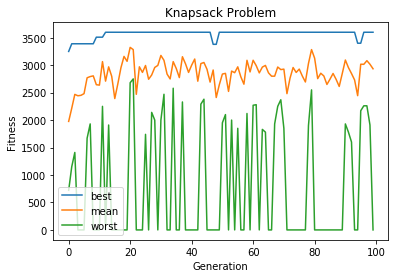

In [13]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': seq_swap_mutation,
    'generation': generation_by_elitism,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Population Generation - Using Steady State

Generation 1
[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: 2570 Cost: 2570 Cargo: 530
[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0] Fitness: 2270 Cost: 2270 Cargo: 500
[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0] Fitness: 2730 Cost: 2730 Cargo: 530
[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: -1 Cost: 2910 Cargo: 610
[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0] Fitness: 1550 Cost: 1550 Cargo: 380
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1] Fitness: 2570 Cost: 2570 Cargo: 440
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0] Fitness: 1550 Cost: 1550 Cargo: 400
[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2460 Cost: 2460 Cargo: 480
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2610 Cost: 2610 Cargo: 500
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: 2220 Cost: 2220 Cargo: 420
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0] Fitness: 1040 Cost: 1040 Cargo: 290
[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2210 Cost: 2210 Cargo: 390
[0,

[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 450
[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 450
[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 560
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0] Fitness: 2810 Cost: 2810 Cargo: 510
[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 440
[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 440
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 480
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 480
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 480
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 480
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 480
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 600
[1, 0, 1, 0,

[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 570
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540

Best: 3410 Mean: 3230.0 Worst: 2500

Generation 19
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3240 Cost: 3240 Cargo: 520
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 460
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3400 Cargo: 710
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1

[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580

Best: 3500 Mean: 3308.4 Worst: 2580

Generation 28
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

Generation 37
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 3060 Cost: 3060 Cargo: 550
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 3220 Cargo: 650
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0] Fitness: 2520 Cost: 2520 Cargo: 560
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 540
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: -1 Cost: 2900 Cargo: 610
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3650 Cargo: 750
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 

Best: 3500 Mean: 3456.4 Worst: 2950

Generation 46
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3030 Cost: 3030 Cargo: 500
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1,

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580

Best: 3500 Mean: 3500.0 Worst: 3500

Generation 71
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580

Best: 3500 Mean: 3345.56 Worst: -1

Generation 79
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: 2820 Cost: 2820 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600

Best: 3600 Mean: 3351.96 Worst: -1

Generation 87
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3290 Cost: 3290 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3430 Cargo: 640
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

Generation 96
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3560 Cargo: 620
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1] Fitness: 2620 Cost: 2620 Cargo: 430
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: -1 Cost: 3450 Cargo: 620
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 

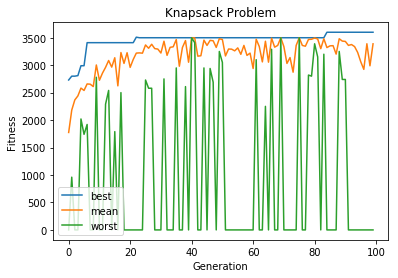

In [14]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': seq_swap_mutation,
    'generation': generation_by_steady_state,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Reproduction - Crossover by Double Points

Generation 1
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0] Fitness: 2330 Cost: 2330 Cargo: 440
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1] Fitness: 2130 Cost: 2130 Cargo: 440
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0] Fitness: 2080 Cost: 2080 Cargo: 390
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1] Fitness: 1650 Cost: 1650 Cargo: 360
[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3140 Cargo: 620
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1] Fitness: 1510 Cost: 1510 Cargo: 230
[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0] Fitness: 2300 Cost: 2300 Cargo: 470
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0] Fitness: 1550 Cost: 1550 Cargo: 280
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 450
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0] Fitness: 1670 Cost: 1670 Cargo: 330
[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1] Fitness: 2150 Cost: 2150 Cargo: 400
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1] Fitness: 2120 Cost: 2120 Cargo: 360
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2020 Cost: 2020 Cargo: 390
[

[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0] Fitness: 2080 Cost: 2080 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2500 Cost: 2500 Cargo: 430
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0] Fitness: 1830 Cost: 1830 Cargo: 390
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 490
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1] Fitness: 2300 Cost: 2300 Cargo: 490

Best: 3340 Mean: 2507.6 Worst: 1720

Generation 9
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0] Fitness: 1860 Cost: 1860 Cargo: 350
[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1] Fitness: 2190 Cost: 2190 Cargo: 500
[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3490 Cargo: 660
[1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 540
[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0] Fitness: 1300 Cost: 1300 Cargo: 310
[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 1630 Cost: 1630 Cargo: 270
[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 540
[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2560 Cost: 2560 Cargo: 430
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 520
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2210 Cost: 2210 Cargo: 390
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fitness: 2500 Cost: 2500 Cargo: 460
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2690 Cost: 2690 Cargo: 510
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1] Fitness: 2720 Cost: 2720 Cargo: 520
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 480
[0, 1, 1, 1, 1

Generation 20
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1] Fitness: 2300 Cost: 2300 Cargo: 480
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3080 Cost: 3080 Cargo: 530
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3280 Cargo: 630
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 510
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3430 Cargo: 620
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3590 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2690 Cost: 2690 Cargo: 510
[1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 580
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1] Fitness: 2020 Cost: 2020 Cargo: 360
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 570
[0, 

[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 550
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: 3010 Cost: 3010 Cargo: 590
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1] Fitness: 2910 Cost: 2910 Cargo: 470
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 560
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0] Fitness: 2030 Cost: 2030 Cargo: 420
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0] Fitness: -1 Cost: 2970 Cargo: 630
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 500
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3220 Cost: 3220 Cargo: 600
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1] Fitness: 2710 Cost: 2710 Cargo: 520
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2930 Cost: 2930 Cargo: 540
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2860 Cost: 2860 Cargo: 570
[0, 1, 1, 1, 1

[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 500
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 500
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2050 Cost: 2050 Cargo: 420
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 500
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 2550 Cost: 2550 Cargo: 490
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 520
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 2970 Cargo: 610
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 500
[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0] Fitness: 2280 Cost: 2280 Cargo: 530
[0, 0, 1, 1, 1

[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1] Fitness: 2020 Cost: 2020 Cargo: 370
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 2470 Cost: 2470 Cargo: 410
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 520
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1] Fitness: 2220 Cost: 2220 Cargo: 390
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1] Fitness: 2620 Cost: 2620 Cargo: 450
[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 2970 Cost: 2970 Cargo: 510

Best: 3280 Mean: 2580.8 Worst: 1770

Generation 39
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2460 Cost: 2460 Cargo: 460
[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2000 Cost: 2000 Cargo: 290
[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 460
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 460
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 570
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1] Fitness: 2480 Cost: 2480 Cargo: 420
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1] Fitness: 2100 Cost: 2100 Cargo: 350
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2670 Cost: 2670 Cargo: 410
[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2090 Cost: 2090 Cargo: 390
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 570
[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 1990 Cost: 1990 Cargo: 280
[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 460
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 660
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2510 Cost: 2510 Cargo: 450
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2210 Cost: 2210 Cargo: 350
[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1] Fitness: 2050 Cost: 2050 Cargo: 340
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 500
[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2420 Cost: 2420 Cargo: 420
[1, 1, 0, 0, 1

Generation 50
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2250 Cost: 2250 Cargo: 440
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2250 Cost: 2250 Cargo: 440
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 530
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 520
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 420
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1] Fitness: -1 Cost: 3060 Cargo: 610
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 510
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1] Fitness: 2060 Cost: 2060 Cargo: 360
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 520
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 530
[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 1950 Cost: 1950 Cargo: 440
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3610 Cargo: 610
[0

Generation 57
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 2560 Cost: 2560 Cargo: 450
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 480
[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2690 Cost: 2690 Cargo: 460
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0] Fitness: 2340 Cost: 2340 Cargo: 460
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0] Fitness: 1610 Cost: 1610 Cargo: 330
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3190 Cost: 3190 Cargo: 580
[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 560
[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1] Fitness: 2240 Cost: 2240 Cargo: 460
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 520
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2300 Cost: 2300 Cargo: 390
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 590
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 590
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 51

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 520
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 600
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3560 Cargo: 620
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 410
[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0] Fitness: 1960 Cost: 1960 Cargo: 320
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2110 Cost: 2110 Cargo: 400
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1] Fitness: 2710 Cost: 2710 Cargo: 520
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2110 Cost: 2110 Cargo: 400
[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2000 Cost: 2000 Cargo: 360
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1] Fitness: 2560 Cost: 2560 Cargo: 500
[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 500
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 440
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 600
[0, 0, 1, 0, 1

Generation 70
[1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 560
[1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 560
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 470
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 600
[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2200 Cost: 2200 Cargo: 410
[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 460
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2710 Cost: 2710 Cargo: 510
[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 2720 Cost: 2720 Cargo: 520
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 560
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3060 Cargo: 610
[1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 560
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2710 Cost: 2710 Cargo: 510
[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1] Fitness: 2480 Cost: 2480 Cargo: 560


Best: 3260 Mean: 2526.4 Worst: 1680

Generation 77
[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 460
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 570
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 540
[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 1840 Cost: 1840 Cargo: 400
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 1950 Cost: 1950 Cargo: 390
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0] Fitness: 1130 Cost: 1130 Cargo: 250
[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1] Fitness: 2420 Cost: 2420 Cargo: 520
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 480
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1] Fitness: 2530 Cost: 2530 Cargo: 510
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 440
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1] Fitness: 1700 Cost: 1700 Cargo: 290
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 

[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 530
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3270 Cost: 3270 Cargo: 550
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3020 Cost: 3020 Cargo: 500
[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 2720 Cost: 2720 Cargo: 500
[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1] Fitness: 2480 Cost: 2480 Cargo: 500
[0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1] Fitness: 2710 Cost: 2710 Cargo: 490
[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1] Fitness: 2250 Cost: 2250 Cargo: 410
[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 530
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 490
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 2560 Cost: 2560 Cargo: 490
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2930 Cost: 2930 Cargo: 460
[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 1990 Cost: 1990 Cargo: 410
[1, 0, 1, 0,

Generation 90
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1] Fitness: 1950 Cost: 1950 Cargo: 290
[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2400 Cost: 2400 Cargo: 510
[1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2730 Cost: 2730 Cargo: 490
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] Fitness: 1950 Cost: 1950 Cargo: 360
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 560
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2980 Cost: 2980 Cargo: 530
[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1] Fitness: 1860 Cost: 1860 Cargo: 430
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2780 Cost: 2780 Cargo: 530
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3500 Cargo: 640
[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 520
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2150 Cost: 2150 Cargo: 440
[1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2730 Cost: 2730 Cargo: 490


[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 570
[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 400
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 490
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2310 Cost: 2310 Cargo: 400
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2410 Cost: 2410 Cargo: 410
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2560 Cost: 2560 Cargo: 390
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 560
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 460
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 460
[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 590
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 590
[0, 1, 0, 1,

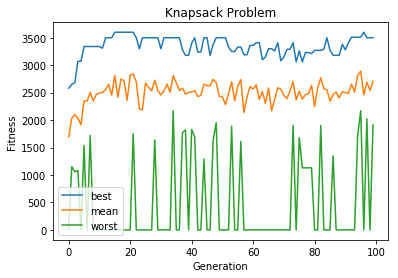

In [15]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': double_crossover_reproduction,
    'mutation': seq_swap_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Reproduction - Duplication (Asexual)

Generation 1
[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0] Fitness: 1610 Cost: 1610 Cargo: 360
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1] Fitness: 2410 Cost: 2410 Cargo: 460
[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2250 Cost: 2250 Cargo: 440
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: -1 Cost: 2860 Cargo: 610
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0] Fitness: 1150 Cost: 1150 Cargo: 220
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3380 Cargo: 610
[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: 2510 Cost: 2510 Cargo: 490
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0] Fitness: 1710 Cost: 1710 Cargo: 400
[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 1910 Cost: 1910 Cargo: 350
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2870 Cost: 2870 Cargo: 580
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1] Fitness: 1720 Cost: 1720 Cargo: 330
[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0] Fitness: 1490 Cost: 1490 Cargo: 230
[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2960 Cost: 2960 Cargo: 550
[0,

[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1] Fitness: 2440 Cost: 2440 Cargo: 460
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2310 Cost: 2310 Cargo: 420

Best: 3600 Mean: 2289.6 Worst: 1650

Generation 8
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 2310 Cost: 2310 Cargo: 420
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 540
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: 2660 Cost: 2660 Cargo: 500
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1] Fitness: 2180 Cost: 2180 Cargo: 420
[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0] Fitness: 1530 Cost: 1530 Cargo: 320
[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1] Fitness: 2140 Cost: 2140 Cargo: 380
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1] Fitness: 2000 Cost: 2000 Cargo: 360
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0] Fitness: 2490 Cost: 2490 Cargo: 430
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 

[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0] Fitness: 2050 Cost: 2050 Cargo: 400
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1] Fitness: 2330 Cost: 2330 Cargo: 470
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3430 Cargo: 640
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1] Fitness: 1980 Cost: 1980 Cargo: 390
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0] Fitness: 2150 Cost: 2150 Cargo: 480
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0] Fitness: 2240 Cost: 2240 Cargo: 430
[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1] Fitness: 2330 Cost: 2330 Cargo: 470
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0] Fitness: 2240 Cost: 2240 Cargo: 430
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1] Fitness: 2180 Cost: 2180 Cargo: 420
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0] Fitness: 2490 Cost: 2490 Cargo: 430
[1, 0, 1, 0, 1

Generation 20
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0] Fitness: 2240 Cost: 2240 Cargo: 430
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 2820 Cost: 2820 Cargo: 490
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 560
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1] Fitness: 2170 Cost: 2170 Cargo: 430
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0] Fitness: 1720 Cost: 1720 Cargo: 390
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 470
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1] Fitness: 3170 Cost: 3170 Cargo: 520
[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1] Fitness: 2960 Cost: 2960 Cargo: 55

[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 490
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] Fitness: 2490 Cost: 2490 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1] Fitness: 2470 Cost: 2470 Cargo: 520
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1] Fitness: 2800 Cost: 2800 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 0, 0,

Generation 33
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 540
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 540
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0] Fitness: 2730 Cost: 2730 Cargo: 560
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 520
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 510
[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 470
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1] Fitness: 2710 Cost: 2710 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 2930 Cost: 2930 Cargo: 520
[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 470
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1] Fitness: 1700 Cost: 1700 Cargo: 32

[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 470
[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 2350 Cost: 2350 Cargo: 440
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 470
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 510
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 590
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 540
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 520
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 510

Best: 3600 Mean: 2942.4 Worst: 2350

Generation 39
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

Generation 44
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 510
[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 480
[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 2690 Cost: 2690 Cargo: 470
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2230 Cost: 2230 Cargo: 430
[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2610 Cost: 2610 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 2980 Cost: 2980 Cargo: 540
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 480
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3210 Cost: 3210 Cargo: 560
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2230 Cost: 2230 Cargo: 430
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 520
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 56

[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 530
[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 480

Best: 3410 Mean: 2843.6 Worst: 2040

Generation 50
[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1] Fitness: 2230 Cost: 2230 Cargo: 470
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 400
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 530
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 530
[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2340 Cost: 2340 Cargo: 420
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3070 Cost: 3070 Cargo: 530
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2190 Cost: 2190 Cargo: 410
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

Generation 55
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 550
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0] Fitness: 2360 Cost: 2360 Cargo: 440
[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2250 Cost: 2250 Cargo: 430
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1] Fitness: 2430 Cost: 2430 Cargo: 460
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0] Fitness: 2620 Cost: 2620 Cargo: 500
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 420
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 550
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 59

Generation 61
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0] Fitness: 2200 Cost: 2200 Cargo: 460
[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1] Fitness: 2140 Cost: 2140 Cargo: 380
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0] Fitness: 2360 Cost: 2360 Cargo: 440
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 530
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 530
[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0] Fitness: 1820 Cost: 1820 Cargo: 400
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 550
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2520 Cost: 2520 Cargo: 480
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 550
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 3170 Cost: 3170 Cargo: 58

Generation 67
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0] Fitness: 2330 Cost: 2330 Cargo: 440
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 520
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 560
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1] Fitness: 2080 Cost: 2080 Cargo: 440
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1] Fitness: 2600 Cost: 2600 Cargo: 550
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 560
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 560
[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 2410 Cost: 2410 Cargo: 430
[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 500
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3200 Cost: 3200 Cargo: 590
[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 500
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 560
[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 50

Generation 73
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2860 Cost: 2860 Cargo: 560
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2710 Cost: 2710 Cargo: 550
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1] Fitness: 2480 Cost: 2480 Cargo: 490
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2860 Cost: 2860 Cargo: 560
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1] Fitness: 2080 Cost: 2080 Cargo: 440
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1] Fitness: 2770 Cost: 2770 Cargo: 490
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 410
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2660 Cost: 2660 Cargo: 490
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2310 Cost: 2310 Cargo: 460
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 58

Generation 80
[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 560
[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0] Fitness: 1540 Cost: 1540 Cargo: 360
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2660 Cost: 2660 Cargo: 490
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2660 Cost: 2660 Cargo: 490
[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1] Fitness: 2210 Cost: 2210 Cargo: 520
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2860 Cost: 2860 Cargo: 560
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2860 Cost: 2860 Cargo: 560
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1] Fitness: 2600 Cost: 2600 Cargo: 550
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 47

Generation 86
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 410
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 410
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 410
[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1] Fitness: 2070 Cost: 2070 Cargo: 420
[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0] Fitness: 2280 Cost: 2280 Cargo: 500
[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0] Fitness: 2280 Cost: 2280 Cargo: 530
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fitness: 2860 Cost: 2860 Cargo: 560
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1] Fitness: 3000 Cost: 3000 Cargo: 570
[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0] Fitness: 2280 Cost: 2280 Cargo: 530
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0] Fitness: 2310 Cost: 2310 Cargo: 550
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 580
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1] Fitness: 3000 Cost: 3000 Cargo: 570
[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 58

Generation 92
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 2790 Cost: 2790 Cargo: 570
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 600
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 600
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 540
[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0] Fitness: 1780 Cost: 1780 Cargo: 430
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 600
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 560
[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 2500 Cost: 2500 Cargo: 550
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0] Fitness: 2010 Cost: 2010 Cargo: 370
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 2790 Cost: 2790 Cargo: 570
[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3140 Cargo: 640
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1] Fitness: 3000 Cost: 3000 Cargo: 570
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1] Fitness: 2100 Cost: 2100 Cargo: 370


[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 520
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 2870 Cost: 2870 Cargo: 530
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 500
[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 1840 Cost: 1840 Cargo: 400
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1] Fitness: 2390 Cost: 2390 Cargo: 420
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2610 Cost: 2610 Cargo: 530
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1] Fitness: 3000 Cost: 3000 Cargo: 570
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2610 Cost: 2610 Cargo: 530
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 600
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2610 Cost: 2610 Cargo: 530
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 600
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1] Fitness: 2730 Cost: 2730 Cargo: 570
[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1] Fitness: 2630 Cost: 2630 Cargo: 540
[0, 1, 0, 1,

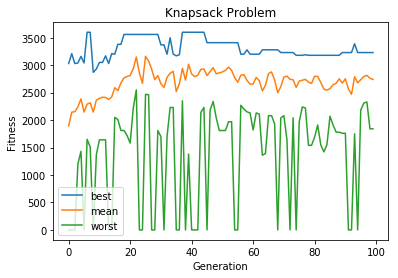

In [16]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': asexual_reproduction,
    'mutation': seq_swap_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Mutation - Generative

Generation 1
[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1] Fitness: 2270 Cost: 2270 Cargo: 440
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0] Fitness: 1170 Cost: 1170 Cargo: 260
[1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0] Fitness: 1210 Cost: 1210 Cargo: 370
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0] Fitness: 1740 Cost: 1740 Cargo: 370
[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1] Fitness: 1750 Cost: 1750 Cargo: 360
[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2340 Cost: 2340 Cargo: 370
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 570
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0] Fitness: 2230 Cost: 2230 Cargo: 460
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0] Fitness: 1520 Cost: 1520 Cargo: 260
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fitness: 2510 Cost: 2510 Cargo: 470
[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0] Fitness: 2150 Cost: 2150 Cargo: 410
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2460 Cost: 2460 Cargo: 390
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550

[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0] Fitness: 2150 Cost: 2150 Cargo: 510
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 600
[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0] Fitness: 2040 Cost: 2040 Cargo: 470
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1] Fitness: 2220 Cost: 2220 Cargo: 480

Best: 3170 Mean: 2201.96 Worst: -1

Generation 9
[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1] Fitness: 1970 Cost: 1970 Cargo: 370
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0] Fitness: 2620 Cost: 2620 Cargo: 570
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 550
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 2920 Cost: 2920 Cargo: 570
[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0] Fitness: 2500 Cost: 2500 Cargo: 520
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 600
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fitness: 2680 Cost: 2680 Cargo: 470
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 600
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2970 Cost: 2970 Cargo: 580
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3170 Cost: 3170 Cargo: 560
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 550
[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 2830 Cost: 2830 Cargo: 530
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 550
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0] Fitness: 2470 Cost: 2470 Cargo: 410
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1] Fitness: -1 Cost: 3060 Cargo: 610
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1] Fitness: 2120 Cost: 2120 Cargo: 460
[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0] Fitness: 2220 Cost: 2220 Cargo: 420
[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1] Fitness: 1960 Cost: 1960 Cargo: 410
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 550
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1] Fitness: 1820 Cost: 1820 Cargo: 430
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2820 Cost: 2820 Cargo: 550
[1, 0, 1, 1, 1

Generation 20
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 1760 Cost: 1760 Cargo: 250
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 550
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 2350 Cost: 2350 Cargo: 510
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 550
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0] Fitness: 2070 Cost: 2070 Cargo: 490
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 510
[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2500 Cost: 2500 Cargo: 420
[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: 2410 Cost: 2410 Cargo: 510
[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1] Fitness: 1690 Cost: 1690 Cargo: 380
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 1760 Cost: 1760 Cargo: 250
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 60

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 570

Best: 3340 Mean: 2656.36 Worst: -1

Generation 28
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2670 Cost: 2670 Cargo: 550
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2170 Cost: 2170 Cargo: 450
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 500
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1] Fitness: 2350 Cost: 2350 Cargo: 510
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 510
[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1] Fitness: 2250 Cost: 2250 Cargo: 360
[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 600
[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2490 Cost: 2490 Cargo: 460
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 500
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 500
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 570
[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

Best: 3380 Mean: 2377.12 Worst: -1

Generation 35
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1] Fitness: 2600 Cost: 2600 Cargo: 550
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fitness: 3090 Cost: 3090 Cargo: 590
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0] Fitness: 2050 Cost: 2050 Cargo: 410
[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 520
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0] Fitness: 2050 Cost: 2050 Cargo: 410
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0] Fitness: 1870 Cost: 1870 Cargo: 350
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 480
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0] Fitness: 2150 Cost: 2150 Cargo: 460
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 420
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1] Fitness: 2350 Cost: 2350 Cargo: 410
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 450
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 450
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 550
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: -1 Cost: 3210 Cargo: 620
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 480
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2890 Cost: 2890 Cargo: 550
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1] Fitness: 2370 Cost: 2370 Cargo: 450
[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1] Fitness: 2510 Cost: 2510 Cargo: 510
[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 520
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 550
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 510

Best: 3100 Mean: 2496.72 Worst: -1

Generation 42
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 470
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: 2820 Cost: 2820 Cargo: 570
[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]

Generation 48
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3310 Cost: 3310 Cargo: 580
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 550
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3130 Cost: 3130 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1] Fitness: 2970 Cost: 2970 Cargo: 490
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1] Fitness: 2570 Cost: 2570 Cargo: 440
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2200 Cost: 2200 Cargo: 380
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 470
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 470
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2200 Cost: 2200 Cargo: 380
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2890 Cost: 2890 Cargo: 510
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2200 Cost: 2200 Cargo: 380
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 58

Generation 55
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 470
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 560
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1] Fitness: 3060 Cost: 3060 Cargo: 530
[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 440
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 440
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 470
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3530 Cost: 3530 Cargo: 600
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2590 Cost: 2590 Cargo: 430
[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 440
[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 440
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2890 Cost: 2890 Cargo: 510
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 47

[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 470
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0] Fitness: 2450 Cost: 2450 Cargo: 430
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1] Fitness: 1690 Cost: 1690 Cargo: 330
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1] Fitness: 3170 Cost: 3170 Cargo: 520
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 480
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3240 Cost: 3240 Cargo: 520
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 470

Best: 3400 Mean: 2924.8 Worst: 1690

Generation 61
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0] Fitness: 2710 Cost: 2710 Cargo: 490
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 2560 Cost: 2560 Cargo: 440
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1] Fitness: 3010 Cost: 3010 Cargo: 490
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1] Fitness: 3040 Cost: 3040 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0] Fitness: 2610 Cost: 2610 Cargo: 500
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0] Fitness: 2730 Cost: 2730 Cargo: 560
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 580
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3360 Cost: 3360 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0] Fitness: 2820 Cost: 2820 Cargo: 500
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2870 Cost: 2870 Cargo: 580
[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0] Fitness: 2320 Cost: 2320 Cargo: 450

Best: 3400 Mean: 2881.2 Worst: 2140

Generation 68
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

Generation 73
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1] Fitness: 2980 Cost: 2980 Cargo: 530
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3120 Cost: 3120 Cargo: 550
[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0] Fitness: 2360 Cost: 2360 Cargo: 520
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 570
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0] Fitness: 2250 Cost: 2250 Cargo: 530
[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 480
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1] Fitness: 2630 Cost: 2630 Cargo: 450
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1] Fitness: -1 Cost: 3000 Cargo: 630
[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2290 Cost: 2290 Cargo: 350
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 590
[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2770 Cost: 2770 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 550


Generation 79
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3120 Cost: 3120 Cargo: 550
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 600
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1] Fitness: 1530 Cost: 1530 Cargo: 260
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3120 Cost: 3120 Cargo: 550
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1] Fitness: 3020 Cost: 3020 Cargo: 600
[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2190 Cost: 2190 Cargo: 350
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 570
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2520 Cost: 2520 Cargo: 400
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1] Fitness: 1750 Cost: 1750 Cargo: 330
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 2480 Cost: 2480 Cargo: 400
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1] Fitness: 2440 Cost: 2440 Cargo: 470
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3240 Cost: 3240 Cargo: 52

[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 3280 Cost: 3280 Cargo: 580
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 510
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2870 Cost: 2870 Cargo: 580
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2520 Cost: 2520 Cargo: 490
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 530
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1] Fitness: 2890 Cost: 2890 Cargo: 520
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1] Fitness: 2550 Cost: 2550 Cargo: 450
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1] Fitness: 2900 Cost: 2900 Cargo: 580
[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1] Fitness: 2370 Cost: 2370 Cargo: 410
[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1] Fitness: 2930 Cost: 2930 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2650 Cost: 2650 Cargo: 480
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[1, 0, 1, 1,

Generation 92
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1] Fitness: 2490 Cost: 2490 Cargo: 470
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 3020 Cost: 3020 Cargo: 530
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1] Fitness: 3020 Cost: 3020 Cargo: 530
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2870 Cost: 2870 Cargo: 580
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1] Fitness: 2490 Cost: 2490 Cargo: 470
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3120 Cost: 3120 Cargo: 550
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 520
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1] Fitness: 2140 Cost: 2140 Cargo: 450
[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2520 Cost: 2520 Cargo: 490
[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2680 Cost: 2680 Cargo: 490
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 540
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0] Fitness: 2570 Cost: 2570 Cargo: 48

[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 470

Best: 3250 Mean: 2661.2 Worst: 2080

Generation 99
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 460
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1] Fitness: 2740 Cost: 2740 Cargo: 540
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0] Fitness: 1980 Cost: 1980 Cargo: 340
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0] Fitness: 2350 Cost: 2350 Cargo: 440
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1] Fitness: 2570 Cost: 2570 Cargo: 480
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 520
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1] Fitness: -1 Cost: 3110 Cargo: 640
[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2770 Cost: 2770 Cargo: 530
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1] Fitness: 2010 Cost: 2010 Cargo: 320
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 560
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0

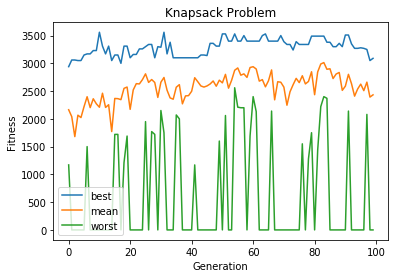

In [19]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': generative_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Mutation - Swap

Generation 1
[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 2610 Cost: 2610 Cargo: 480
[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0] Fitness: 1970 Cost: 1970 Cargo: 430
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 2870 Cost: 2870 Cargo: 500
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0] Fitness: 1430 Cost: 1430 Cargo: 290
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0] Fitness: 1170 Cost: 1170 Cargo: 280
[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0] Fitness: 2530 Cost: 2530 Cargo: 520
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2850 Cost: 2850 Cargo: 540
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0] Fitness: 1330 Cost: 1330 Cargo: 320
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0] Fitness: 1990 Cost: 1990 Cargo: 460
[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0] Fitness: 1510 Cost: 1510 Cargo: 300
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0] Fitness: 1090 Cost: 1090 Cargo: 250
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1] Fitness: 2650 Cost: 2650 Cargo: 580
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0] Fitness: 1840 Cost: 1840 Cargo: 400

Generation 8
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1] Fitness: 2520 Cost: 2520 Cargo: 400
[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 560
[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2190 Cost: 2190 Cargo: 400
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0] Fitness: 1920 Cost: 1920 Cargo: 410
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2490 Cost: 2490 Cargo: 480
[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 560
[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1] Fitness: 2340 Cost: 2340 Cargo: 500
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 530
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 530
[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2490 Cost: 2490 Cargo: 460
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1] Fitness: -1 Cost: 2910 Cargo: 620
[

Generation 13
[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1] Fitness: 1890 Cost: 1890 Cargo: 350
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3660 Cargo: 670
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 530
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: 2880 Cost: 2880 Cargo: 480
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 590
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1] Fitness: 2520 Cost: 2520 Cargo: 400
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1] Fitness: 2520 Cost: 2520 Cargo: 400
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 500
[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 2930 Cost: 2930 Cargo: 520
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 430
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0] Fitness: 2480 Cost: 2480 Cargo: 420


Generation 20
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 500
[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2400 Cost: 2400 Cargo: 340
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1] Fitness: 2500 Cost: 2500 Cargo: 460
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2150 Cost: 2150 Cargo: 370
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3450 Cargo: 680
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 600
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 570
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2640 Cost: 2640 Cargo: 440
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2180 Cost: 2180 Cargo: 320
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 600
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3260 Cost: 3260 Cargo: 590


[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 600
[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0] Fitness: 2680 Cost: 2680 Cargo: 530
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 570
[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 2830 Cargo: 610
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2490 Cost: 2490 Cargo: 440
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2800 Cost: 2800 Cargo: 560
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 600
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2530 Cost: 2530 Cargo: 410
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 600
[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2530 Cost: 2530 Cargo: 510
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 600
[1, 1, 1, 1, 1

[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 560
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 560
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 3080 Cost: 3080 Cargo: 580
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2180 Cost: 2180 Cargo: 460
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510

Best: 3300 Mean: 2671.96 Worst: -1

Generation 34
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3450 Cargo: 680
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 530
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2290 Cost: 2290 Cargo: 450
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2660 Cost: 2660 Cargo: 490
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 560
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2180 Cost: 2180 Cargo: 460
[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]

[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2180 Cost: 2180 Cargo: 460
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2660 Cost: 2660 Cargo: 490
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 3080 Cost: 3080 Cargo: 580
[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2990 Cost: 2990 Cargo: 540
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2890 Cost: 2890 Cargo: 520
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2180 Cost: 2180 Cargo: 460
[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 480
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2290 Cost: 2290 Cargo: 450
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1] Fitness: 2680 Cost: 2680 Cargo: 490
[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2180 Cost: 2180 Cargo: 460

Best: 3300 Mean: 2727.6 Worst: 2160

Generation 39
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,

Generation 44
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0] Fitness: 1700 Cost: 1700 Cargo: 350
[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 400
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0] Fitness: 1890 Cost: 1890 Cargo: 360
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 3040 Cost: 3040 Cargo: 580
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2440 Cost: 2440 Cargo: 430
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2890 Cost: 2890 Cargo: 490
[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0] Fitness: 2160 Cost: 2160 Cargo: 400
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2400 Cost: 2400 Cargo: 440
[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 2680 Cost: 2680 Cargo: 550
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0] Fitness: 2590 Cost: 2590 Cargo: 490
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2280 Cost: 2280 Cargo: 44

Generation 50
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1] Fitness: 2290 Cost: 2290 Cargo: 450
[1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2460 Cost: 2460 Cargo: 520
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 530
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 520
[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 2880 Cost: 2880 Cargo: 550
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 540
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0] Fitness: 2110 Cost: 2110 Cargo: 420
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 510
[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2510 Cost: 2510 Cargo: 430
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 550
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 560
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0] Fitness: 2330 Cost: 2330 Cargo: 51

Generation 56
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 550
[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 540
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 480
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3130 Cargo: 610
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3210 Cost: 3210 Cargo: 560
[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 480
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] Fitness: 2980 Cost: 2980 Cargo: 560
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2360 Cost: 2360 Cargo: 370
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2710 Cost: 2710 Cargo: 460
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 2610 Cost: 2610 Cargo: 440


[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1] Fitness: 2600 Cost: 2600 Cargo: 450
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3000 Cargo: 620
[0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: 2540 Cost: 2540 Cargo: 470
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1] Fitness: 2040 Cost: 2040 Cargo: 420
[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 490
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1] Fitness: 1990 Cost: 1990 Cargo: 390
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 440
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2610 Cost: 2610 Cargo: 410

Best: 3360 Mean: 2516.36 Worst: -1

Generation 62
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2360 Cost: 2360 Cargo: 370
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1] Fitness: 2130 Cost: 2130 Cargo: 360
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 440
[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 490
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2840 Cost: 2840 Cargo: 470
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2560 Cost: 2560 Cargo: 440
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] Fitness: 2750 Cost: 2750 Cargo: 530
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0] Fitness: 2710 Cost: 2710 Cargo: 520
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fitness: 3120 Cost: 3120 Cargo: 600
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 430
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0] Fitness: 2230 Cost: 2230 Cargo: 410
[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0] Fitness: 2490 Cost: 2490 Cargo: 500
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: 2460 Cost: 2460 Cargo: 490
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2360 Cost: 2360 Cargo: 370
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 2710 Cost: 2710 Cargo: 460
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 440
[0, 1, 1, 0,

[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2600 Cost: 2600 Cargo: 410
[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2960 Cost: 2960 Cargo: 550
[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 380
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3240 Cost: 3240 Cargo: 520
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 2930 Cost: 2930 Cargo: 460
[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2560 Cost: 2560 Cargo: 500
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0] Fitness: 2630 Cost: 2630 Cargo: 460
[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3020 Cost: 3020 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 540

Best: 3240 Mean: 2596.76 Worst: -1

Generation 75
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 450
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 450
[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2560 Cost: 2560 Cargo: 500
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 

Generation 81
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2700 Cost: 2700 Cargo: 460
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1] Fitness: 2360 Cost: 2360 Cargo: 440
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 450
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 530
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 430
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 550
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 450
[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2550 Cost: 2550 Cargo: 360
[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2740 Cost: 2740 Cargo: 420
[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 390
[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3140 Cost: 3140 Cargo: 57

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 2950 Cost: 2950 Cargo: 470
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1] Fitness: 2670 Cost: 2670 Cargo: 410
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 450
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 510

Best: 3300 Mean: 3023.2 Worst: 2670

Generation 88
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1] Fitness: 2920 Cost: 2920 Cargo: 550
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1] Fitness: 2630 Cost: 2630 Cargo: 460
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 530

Best: 3250 Mean: 2516.76 Worst: -1

Generation 94
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 500
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1] Fitness: 2530 Cost: 2530 Cargo: 410
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 530
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2510 Cost: 2510 Cargo: 490
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1] Fitness: 2240 Cost: 2240 Cargo: 430
[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 510
[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 510
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1] Fitness: 2780 Cost: 2780 Cargo: 540
[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2150 Cost: 2150 Cargo: 410
[0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 

[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 2450 Cost: 2450 Cargo: 350
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 530

Best: 3250 Mean: 2520.32 Worst: -1

Generation 100
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 470
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1] Fitness: 3030 Cost: 3030 Cargo: 510
[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: 2440 Cost: 2440 Cargo: 490
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1] Fitness: 2580 Cost: 2580 Cargo: 470
[1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3030 Cargo: 610
[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: 2440 Cost: 2440 Cargo: 490
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1] Fitness: 3180 Cost: 3180 Cargo: 590
[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1

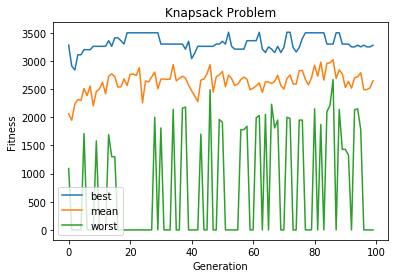

In [20]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': roulette_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': swap_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': max_generations_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### Stop Criteria - Convergence

Generation 1
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1] Fitness: 1890 Cost: 1890 Cargo: 320
[0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0] Fitness: 1480 Cost: 1480 Cargo: 370
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0] Fitness: 2480 Cost: 2480 Cargo: 490
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 660
[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1] Fitness: 2810 Cost: 2810 Cargo: 540
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0] Fitness: 1860 Cost: 1860 Cargo: 340
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0] Fitness: 920 Cost: 920 Cargo: 230
[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0] Fitness: 2500 Cost: 2500 Cargo: 480
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1] Fitness: 2430 Cost: 2430 Cargo: 460
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] Fitness: 2220 Cost: 2220 Cargo: 480
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0] Fitness: 1890 Cost: 1890 Cargo: 410
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0] Fitness: 2010 Cost: 2010 Cargo: 430
[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1] Fitness: 1570 Cost: 1570 Cargo: 340
[0,

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1] Fitness: 3080 Cost: 3080 Cargo: 600
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 0, 0, 0,

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: 3230 Cost: 3230 Cargo: 580
[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1] Fitness: 2630 Cost: 2630 Cargo: 480
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 2980 Cost: 2980 Cargo: 550

Best: 3330 Mean: 2719.04 Worst: -1

3330 24 10
Generation 12
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3110 Cost: 3110 Cargo: 550
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 570
[0, 1, 0, 0, 1, 1, 0, 1, 0

[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 520
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0,

[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 520
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3490 Cargo: 660
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1

3560 24 23
Generation 28
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3760 Cargo: 630
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 

[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 1,

3560 24 21
Generation 39
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 3010 Cost: 3010 Cargo: 590
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 500
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 500
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: 3210 Cost: 3210 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 3560 Cargo: 600
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3560 Cost: 356

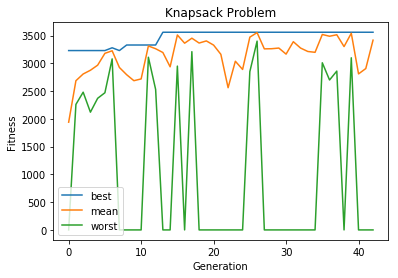

In [33]:
config = Config({
    'problem': maximization_knapsack_problem,
    'selection': tournament_selection,
    'reproduction': single_crossover_reproduction,
    'mutation': swap_mutation,
    'generation': generation_by_exchange,
    'stop_criteria': convergence_criteria
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)